# **Decision Tree Visualization**

In this section, we’ll visualize our **decision tree model** to better understand how it makes predictions. A **decision tree** is a type of model that breaks down the data into smaller subsets by asking a series of **yes-or-no questions** (or **binary decisions**). Each question, or **"split,"** is based on the **features** (columns) in our dataset. The tree structure helps us see how these decisions lead to a **final prediction**.

---

## **Practical Application of Decision Tree on the CKD Dataset**

The **decision tree model** on the **Chronic Kidney Disease (CKD) dataset** serves primarily for **early diagnosis**, helping in the efficient detection of CKD based on patient health indicators like **blood pressure** and **hemoglobin levels**. Early diagnosis is crucial for **timely treatment**, which can slow the progression of CKD and improve **patient outcomes**. This decision tree model can support **clinical software** by automatically identifying CKD risk in patient records, allowing for faster initial screenings.

By using **decision trees**, we can pinpoint the most **influential factors** for CKD prediction, such as key lab results, helping healthcare providers focus on these during routine exams. In **resource-constrained settings**, the model can prioritize high-risk patients for further testing, thus supporting **patient triage** in hospitals. The **clear, hierarchical structure** of the decision tree reveals the order of importance among health indicators, which aids medical professionals in quickly understanding and trusting the model's results.

---

## **How to Interpret the Tree Diagram**

- **Nodes and Splits**: Each rectangle in the tree represents a **"node,"** and each node is a point where the model makes a decision based on a feature in the dataset. For example, the tree might ask, "Is the hemoglobin level above a certain value?" If the answer is **"yes,"** the decision goes one way; if **"no,"** it goes another.

- **Colors and Class Labels**: Each node is **color-coded** according to the **class** it predicts. In our case, we have two classes: **"No CKD"** and **"CKD"**. The colors help to visually separate different classes as the decision tree makes predictions. The tree assigns a prediction for each node (typically shown in colors), indicating the most likely class at that point.

- **Values in the Nodes**:
   - **Gini**: This is a measure of how **"pure"** each node is. Lower values mean the node contains more samples from a single class, making it a good split.
   - **Samples**: This shows the number of **data points** at that split in the dataset.
   - **Values**: These numbers tell us the **distribution of classes** at that node. For example, if it says **[15, 30]**, there are **15 samples** of "No CKD" and **30 samples** of "CKD" at that node.

- **Leaf Nodes**: These are the **final nodes** at the bottom of the tree where no further splitting occurs. Each leaf node represents a **final decision** or classification. The color of each leaf node tells us which **class** it predicts, and the **majority class** within each leaf determines the **final output** for any data point that reaches it.


Accuracy: 0.9875
Precision: 1.0
Recall: 0.9807692307692307
Error Rate: 0.012499999999999956
Confusion Matrix:
[[28  0]
 [ 1 51]]


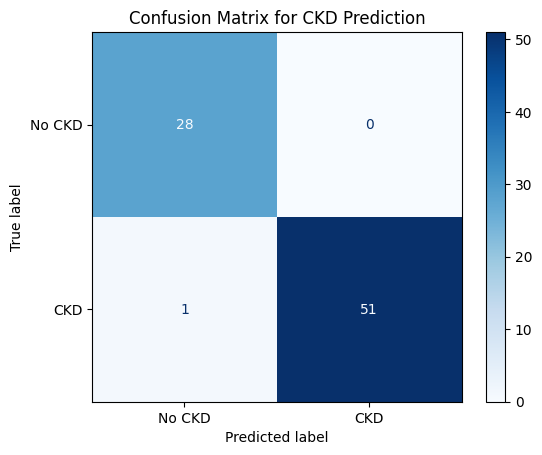

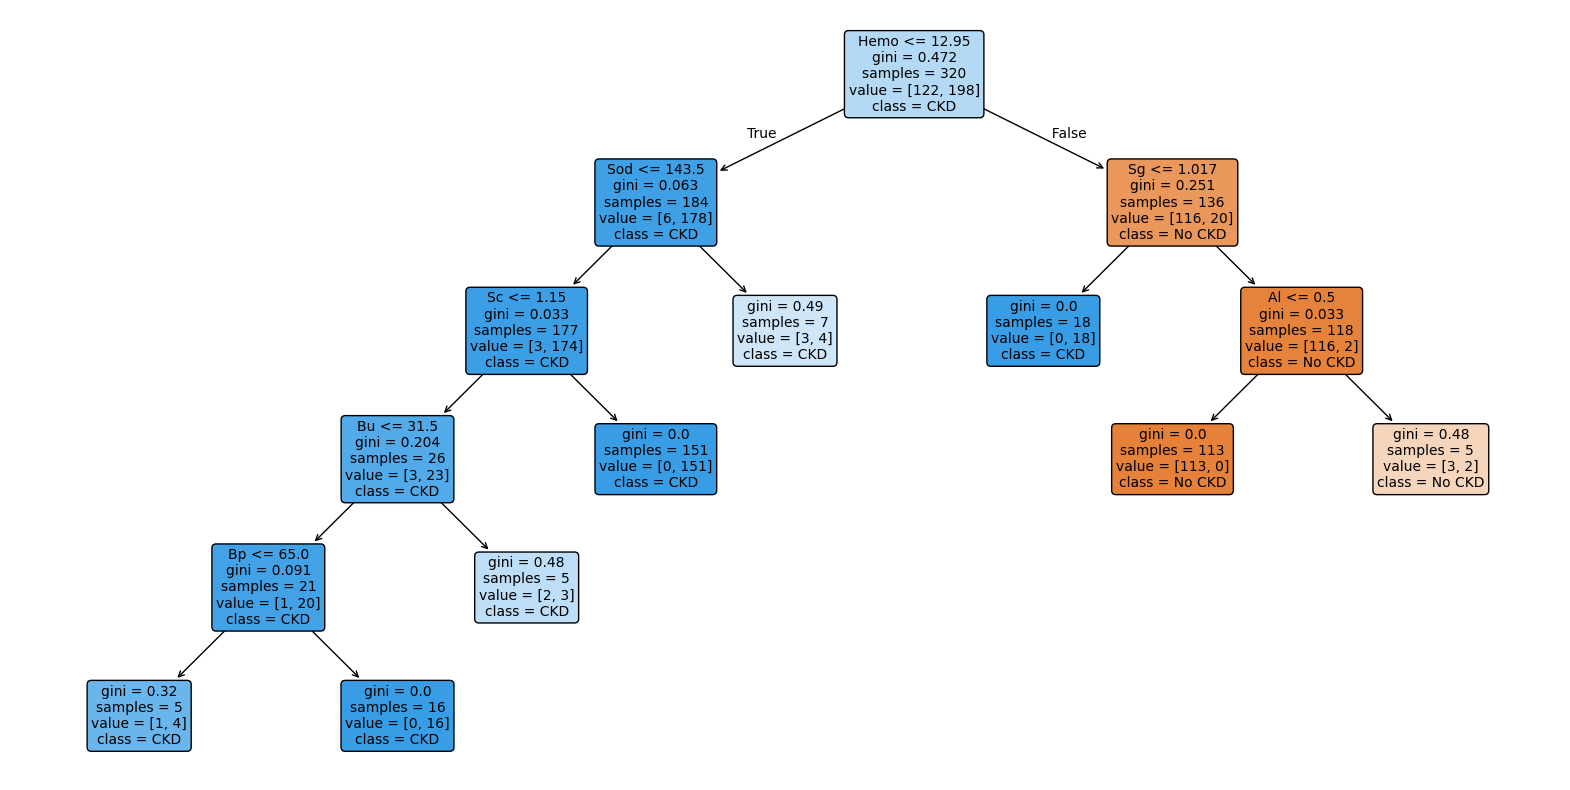

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Load the dataset
data = pd.read_csv('cleaned_CKD_dataset.csv')

# Separate features and target variable
X = data.drop(columns=['Class'])
y = data['Class']

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Decision Tree Classifier with specified parameters
# Setting max depth, min samples split, and min samples leaf to control overfitting
clf = DecisionTreeClassifier(max_depth=5, min_samples_split=10, min_samples_leaf=5, random_state=18)

# Train the model on the training data
clf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = clf.predict(X_test)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
error_rate = 1 - accuracy

# Print metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("Error Rate:", error_rate)

# Print the numerical confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Plot the confusion matrix
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, display_labels=["No CKD", "CKD"], cmap=plt.cm.Blues)
plt.title("Confusion Matrix for CKD Prediction")
plt.show()

# Plot the decision tree
plt.figure(figsize=(20, 10))
plot_tree(
    clf, 
    feature_names=X.columns, 
    class_names=["No CKD", "CKD"], 
    filled=True, 
    rounded=True, 
    fontsize=10
)
plt.show()


In [2]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import KFold
import numpy as np

# Load the dataset
data = pd.read_csv('cleaned_CKD_dataset.csv')

# Separate features and target variable
X = data.drop(columns=['Class'])
y = data['Class']

# Initialize k-Fold Cross-Validation with 5 splits
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Initialize lists to store performance metrics for each fold
accuracies = []
precisions = []
recalls = []

# k-Fold Cross-Validation
for train_index, test_index in kf.split(X):
    # Split the data into training and testing sets for this fold
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Initialize the Decision Tree Classifier with specified parameters
    clf = DecisionTreeClassifier(max_depth=5, min_samples_split=10, min_samples_leaf=5, random_state=42)
    
    # Train the model on the training data
    clf.fit(X_train, y_train)
    
    # Make predictions on the test data
    y_pred = clf.predict(X_test)
    
    # Calculate metrics
    accuracies.append(accuracy_score(y_test, y_pred))
    precisions.append(precision_score(y_test, y_pred))
    recalls.append(recall_score(y_test, y_pred))

# Calculate the average of each metric across all folds
avg_accuracy = np.mean(accuracies)
avg_precision = np.mean(precisions)
avg_recall = np.mean(recalls)

# Print the average metrics
print("Average Accuracy:", avg_accuracy)
print("Average Precision:", avg_precision)
print("Average Recall:", avg_recall)


Average Accuracy: 0.9675
Average Precision: 0.9678150505485213
Average Recall: 0.979491372359297
